In [1]:
import os.path
import numpy as np
import pickle
from sklearn import metrics
import pandas as pd
import xgboost as xgb

# load models and target data

In [2]:
path = os.getcwd()
with open(path + '/data/RFpredval.pkl', 'rb') as file:
    RF_val = pickle.load(file)
with open(path + '/data/SVRpredval.pkl', 'rb') as file:
    SVR_val = pickle.load(file)
with open(path + '/data/REGpredval.pkl', 'rb') as file:
    REG_val = pickle.load(file)
with open(path + '/data/XGBpredval.pkl', 'rb') as file:
    XGB_val = pickle.load(file)
with open(path + '/data/nnpredval.pkl', 'rb') as file:
    nn_val = pickle.load(file)
    
with open(path + '/data/RFpredtrain.pkl', 'rb') as file:
    RF_train = pickle.load(file)
with open(path + '/data/SVRpredtrain.pkl', 'rb') as file:
    SVR_train= pickle.load(file)
with open(path + '/data/REGpredtrain.pkl', 'rb') as file:
    REG_train = pickle.load(file)
with open(path + '/data/XGBpredtrain.pkl', 'rb') as file:
    XGB_train = pickle.load(file)
with open(path + '/data/nnpredtrain.pkl', 'rb') as file:
    nn_train = pickle.load(file)
    
with open(path + '/data/RFpredtest.pkl', 'rb') as file:
    RF_test = pickle.load(file)
with open(path + '/data/SVRpredtest.pkl', 'rb') as file:
    SVR_test= pickle.load(file)
with open(path + '/data/REGpredtest.pkl', 'rb') as file:
    REG_test = pickle.load(file)
with open(path + '/data/XGBpredtest.pkl', 'rb') as file:
    XGB_test = pickle.load(file)
with open(path + '/data/nnpredtest.pkl', 'rb') as file:
    nn_test = pickle.load(file)
    
with open(path + '/data/yTrainValTest.pkl', 'rb') as file:
    y_train,y_val,y_test= pickle.load(file) 


In [3]:
with open(path + '/data/x_data_for_models_all.pkl', 'rb') as file:
    x_train,x_test = pickle.load(file)

In [19]:
with open(path + '/data/OHE_all.pkl', 'rb') as file:
    OHE = pickle.load(file)

with open(path + '/data/TFIDF_all.pkl', 'rb') as file:
    TFIDF = pickle.load(file)

In [20]:
a = OHE[-1]
c = TFIDF[-1]

In [22]:
b = x_test.columns[:79]
d = x_test.columns[79:]

In [24]:
b = [x for x in b]
d = [x for x in d]

In [15]:
a==b

True

In [25]:
c==d

True

In [29]:
len(a)

79

# define bespoke evaluation metrics

In [15]:
def mean_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_range_percentage_error(y_true, y_pred): 
    error = np.abs((y_true- y_pred))-10000
    error[error < 0] = 0
    return np.mean(error/y_true)*100

Mean absolute error

In [18]:
print(' SVR Mean Absolute Error (Val): {0:.0f}'.format( metrics.mean_absolute_error(y_val, SVR_val[0]['y_pred_svr'])))
print(' Linear Reg Mean Absolute Error (Val): {0:.0f}'.format( metrics.mean_absolute_error(y_val, REG_val[0]['y_pred_reg'])))
print(' rf Mean Absolute Error (Val): {0:.0f}'.format( metrics.mean_absolute_error(y_val, RF_val[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error (Val): {0:.0f}'.format( metrics.mean_absolute_error(y_val, XGB_val[0]['y_pred_xgb'])))
print(' NN Mean Absolute Error (Val): {0:.0f}'.format( metrics.mean_absolute_error(y_val, nn_val[0]['y_pred_nn'])))
print(' ')
print(' SVR Mean Absolute Error (train) : {0:.0f}'.format( metrics.mean_absolute_error(y_train, SVR_train[0]['y_pred_svr'])))
print(' Linear Reg Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, REG_train[0]['y_pred_reg'])))
print(' rf Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, RF_train[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, XGB_train[0]['y_pred_xgb'])))
print(' NN Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, nn_train[0]['y_pred_nn'])))


 SVR Mean Absolute Error (Val): 18168
 Linear Reg Mean Absolute Error (Val): 12965
 rf Mean Absolute Error (Val): 12848
 XGB Mean Absolute Error (Val): 11831
 NN Mean Absolute Error (Val): 12512
 
 SVR Mean Absolute Error (train) : 17531
 Linear Reg Mean Absolute Error (train): 9626
 rf Mean Absolute Error (train): 7900
 XGB Mean Absolute Error (train): 7825
 NN Mean Absolute Error (train): 10318


Mean absolute % error

In [20]:
print(' SVR Mean Absolute % Error: {0:.1f}'.format( mean_percentage_error(y_val, SVR_val[0]['y_pred_svr'])))
print(' Linear Reg Mean Absolute %  Error: {0:.1f}'.format( mean_percentage_error(y_val, REG_val[0]['y_pred_reg'])))
print(' rf Mean Absolute Error % : {0:.1f}'.format( mean_percentage_error(y_val, RF_val[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error % : {0:.1f}'.format( mean_percentage_error(y_val, XGB_val[0]['y_pred_xgb'])))
print(' NN Mean Absolute Error % : {0:.1f}'.format( mean_percentage_error(y_val, nn_val[0]['y_pred_nn'])))
print(' ')
print(' SVR Mean Absolute Error %  (train) : {0:.1f}'.format( mean_percentage_error(y_train, SVR_train[0]['y_pred_svr'])))
print(' Linear Reg Mean Absolute %  Error (train): {0:.1f}'.format( mean_percentage_error(y_train, REG_train[0]['y_pred_reg'])))
print(' rf Mean Absolute Error % (train): {0:.1f}'.format( mean_percentage_error(y_train, RF_train[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error % (train): {0:.1f}'.format( mean_percentage_error(y_train, XGB_train[0]['y_pred_xgb'])))
print(' NN Mean Absolute Error % : {0:.1f}'.format( mean_percentage_error(y_val, nn_train[0]['y_pred_nn'])))
print(' ')
print(' SVR Mean Absolute Error %  (test) : {0:.1f}'.format( mean_percentage_error(y_test, SVR_test[0]['y_pred_svr'])))
print(' Linear Reg Mean Absolute %  Error (test): {0:.1f}'.format( mean_percentage_error(y_test, REG_test[0]['y_pred_reg'])))
print(' rf Mean Absolute Error % (test): {0:.1f}'.format( mean_percentage_error(y_test, RF_test[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error % (test): {0:.1f}'.format( mean_percentage_error(y_test, XGB_test[0]['y_pred_xgb'])))
print(' NN Mean Absolute Error % : {0:.1f}'.format( mean_percentage_error(y_test, nn_test[0]['y_pred_nn'])))

 SVR Mean Absolute % Error: 28.8
 Linear Reg Mean Absolute %  Error: 23.9
 rf Mean Absolute Error % : 24.5
 XGB Mean Absolute Error % : 20.3
 NN Mean Absolute Error % : 20.7
 
 SVR Mean Absolute Error %  (train) : 28.6
 Linear Reg Mean Absolute %  Error (train): 18.4
 rf Mean Absolute Error % (train): 17.4
 XGB Mean Absolute Error % (train): 13.7
 NN Mean Absolute Error % : nan
 
 SVR Mean Absolute Error %  (test) : 28.5
 Linear Reg Mean Absolute %  Error (test): 25.1
 rf Mean Absolute Error % (test): 24.8
 XGB Mean Absolute Error % (test): 20.0
 NN Mean Absolute Error % : 22.1


In [22]:
print(' SVR Mean Absolute Range % Error: {0:.1f}'.format( mean_range_percentage_error(y_val, SVR_val[0]['y_pred_svr'])))
print(' Linear Reg Mean Absolute Range %  Error: {0:.1f}'.format( mean_range_percentage_error(y_val, REG_val[0]['y_pred_reg'])))
print(' rf Mean Absolute Range Error % : {0:.1f}'.format( mean_range_percentage_error(y_val, RF_val[0]['y_pred_rf'])))
print(' XGB Mean Absolute Range Error % : {0:.1f}'.format( mean_range_percentage_error(y_val, XGB_val[0]['y_pred_xgb'])))
print(' ')
print(' SVR Mean Absolute Range Error %  (train) : {0:.1f}'.format( mean_range_percentage_error(y_train, SVR_train[0]['y_pred_svr'])))
print(' Linear Reg Mean Range Absolute %  Error (train): {0:.1f}'.format( mean_range_percentage_error(y_train, REG_train[0]['y_pred_reg'])))
print(' rf Mean Absolute Range Error % (train): {0:.1f}'.format( mean_range_percentage_error(y_train, RF_train[0]['y_pred_rf'])))
print(' XGB Mean Absolute Range Error % (train): {0:.1f}'.format( mean_range_percentage_error(y_train, XGB_train[0]['y_pred_xgb'])))

 SVR Mean Absolute Range % Error: 13.5
 Linear Reg Mean Absolute Range %  Error: 8.7
 rf Mean Absolute Range Error % : 9.3
 XGB Mean Absolute Range Error % : 6.5
 
 SVR Mean Absolute Range Error %  (train) : 13.1
 Linear Reg Mean Range Absolute %  Error (train): 4.7
 rf Mean Absolute Range Error % (train): 3.8
 XGB Mean Absolute Range Error % (train): 2.6


# Should we ensemble?
* make a dataframe of estimates from the different models
* Run a linear regression of model estimates
* Predict new target values
* evaluate new target values

In [24]:
train_pred = pd.DataFrame([y_train,SVR_train[0]['y_pred_svr'],REG_train[0]['y_pred_reg'],RF_train[0]['y_pred_rf'],XGB_train[0]['y_pred_xgb'],nn_train[0]['y_pred_nn']]).T
val_pred = pd.DataFrame([y_val,SVR_val[0]['y_pred_svr'],REG_val[0]['y_pred_reg'],RF_val[0]['y_pred_rf'],XGB_val[0]['y_pred_xgb'],nn_val[0]['y_pred_nn']]).T
test_pred = pd.DataFrame([y_test,SVR_test[0]['y_pred_svr'],REG_test[0]['y_pred_reg'],RF_test[0]['y_pred_rf'],XGB_test[0]['y_pred_xgb'],nn_test[0]['y_pred_nn']]).T

In [42]:
from sklearn.linear_model import LinearRegression
X = train_pred[[ 'y_pred_reg','y_pred_rf',
       'y_pred_xgb','y_pred_svr','y_pred_nn']]
y = train_pred ['salary_average_euros']

#'y_pred_svr','y_pred_nn'
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model.coef_

array([ 0.27106175,  0.68146679,  0.33827777, -0.21502314, -0.06091907])

In [44]:
y_all_pred_train = model.predict(X)
y_all_pred_val = model.predict(val_pred[[ 'y_pred_reg','y_pred_rf',
       'y_pred_xgb','y_pred_svr','y_pred_nn']])
y_all_pred_test =model.predict( test_pred [[ 'y_pred_reg','y_pred_rf',
       'y_pred_xgb','y_pred_svr','y_pred_nn']])

In [45]:
print('Ensemble Mean % Error (train): {0:.1f}'.format( mean_percentage_error(y_train, y_all_pred_train)))
print('Ensemble Mean % Error (val): {0:.1f}'.format( mean_percentage_error(y_val, y_all_pred_val)))
print('Ensemble Mean % Error (test): {0:.1f}'.format( mean_percentage_error(y_test, y_all_pred_test)))

Ensemble Mean % Error (train): 14.7
Ensemble Mean % Error (val): 22.1
Ensemble Mean % Error (test): 22.3


# How much better than the mean are the predictions?



In [53]:
mean = np.mean(y_train)
mean_train = np.repeat(mean,y_train.shape[0])
mean_test = np.repeat(mean,y_test.shape[0])
mean_val = np.repeat(mean,y_val.shape[0])

In [54]:
print('Mean only  Mean % Error (train): {0:.1f}'.format( mean_percentage_error(y_train, mean_train)))
print('Mean onlyMean % Error (val): {0:.1f}'.format( mean_percentage_error(y_val, mean_val)))
print('Mean only Mean % Error (test): {0:.1f}'.format( mean_percentage_error(y_test, mean_test)))

Mean only  Mean % Error (train): 58.1
Mean onlyMean % Error (val): 55.9
Mean only Mean % Error (test): 58.7


In [52]:
mean_train

array([61787.29368436, 61787.29368436, 61787.29368436, ...,
       61787.29368436, 61787.29368436, 61787.29368436])

# Plot predictions against true values
1. Ensemble
2. XGB

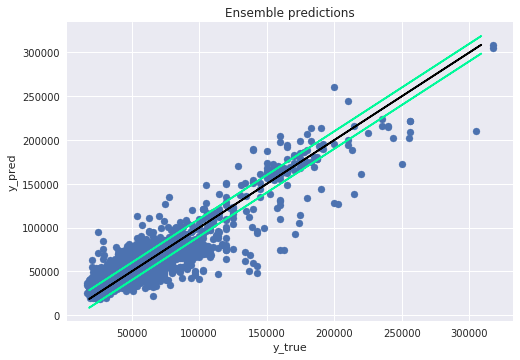

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
with plt.style.context('seaborn'):
    ax = plt.scatter(y_val,y_all_pred_val)
    plt.plot(y_all_pred_val,y_all_pred_val, color='black')
    plt.plot(y_all_pred_val, y_all_pred_val-10000, color='mediumspringgreen')
    plt.plot(y_all_pred_val, y_all_pred_val+10000, color='mediumspringgreen')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('Ensemble predictions')

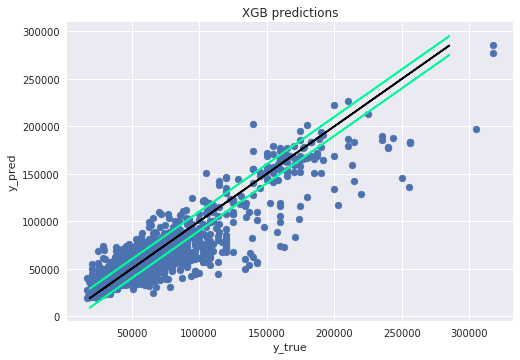

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
with plt.style.context('seaborn'):
    ax = plt.scatter(y_val,XGB_val[0]['y_pred_xgb'])
    plt.plot(XGB_val[0]['y_pred_xgb'], XGB_val[0]['y_pred_xgb'], color='black')
    plt.plot(XGB_val[0]['y_pred_xgb'], XGB_val[0]['y_pred_xgb']-10000, color='mediumspringgreen')
    plt.plot(XGB_val[0]['y_pred_xgb'], XGB_val[0]['y_pred_xgb']+10000, color='mediumspringgreen')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('XGB predictions')

# Plot Errors

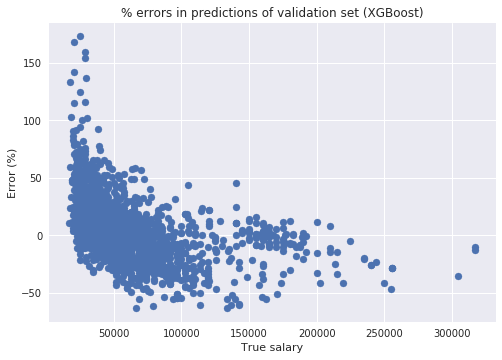

In [74]:
with plt.style.context('seaborn'):
    ax = plt.scatter(y_val,(XGB_val[0]['y_pred_xgb']/y_val-1)*100)
    plt.title('% errors in predictions of validation set (XGBoost)')
    plt.xlabel('True salary €')
    plt.ylabel('Error (%)')
plt.savefig('C:/Users/lundr/DSJ/DataScienceJobs/Assets/XGBerrorspecrcent.png')

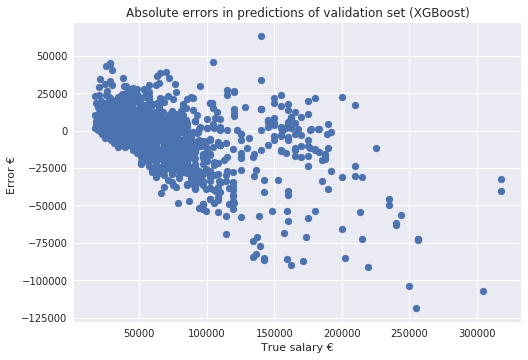

In [75]:

with plt.style.context('seaborn'):
    ax = plt.scatter(y_val,XGB_val[0]['y_pred_xgb'] - y_val)
    plt.title('Absolute errors in predictions of validation set (XGBoost)')
    plt.xlabel('True salary €')
    plt.ylabel('Error € ')
plt.savefig('C:/Users/lundr/DSJ/DataScienceJobs/Assets/XGBerrorsabs.png')


Make SHAP plots to examine XGB features

In [66]:
path = os.getcwd()
parent_folder, current_folder = os.path.split(path)

with open(path+ '/Pickles/xgb_model_all.pkl', 'rb') as file:
       xgb_model = pickle.load(file)

with open(path + '/data/x_data_for_models_all.pkl', 'rb') as file:
        x_train,x_test = pickle.load(file)
        

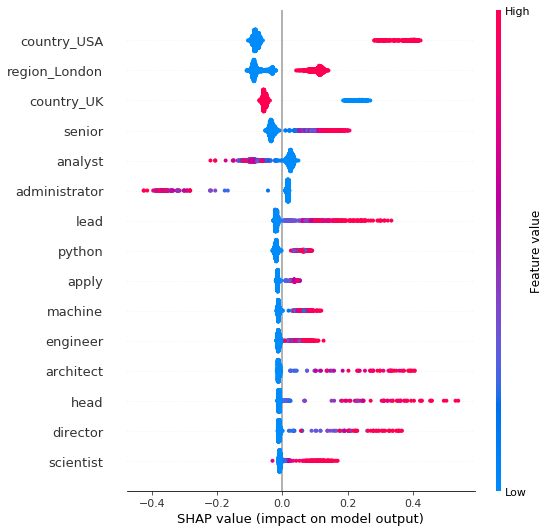

In [72]:
import shap
import matplotlib.pyplot as plt
# DF, based on which importance is checked
X_importance = x_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_importance)
# Plot summary_plot
shap.summary_plot(shap_values, X_importance,max_display=15, show=False)
plt.tight_layout()
plt.savefig('C:/Users/lundr/DSJ/DataScienceJobs/Assets/SHAP_chart.png')

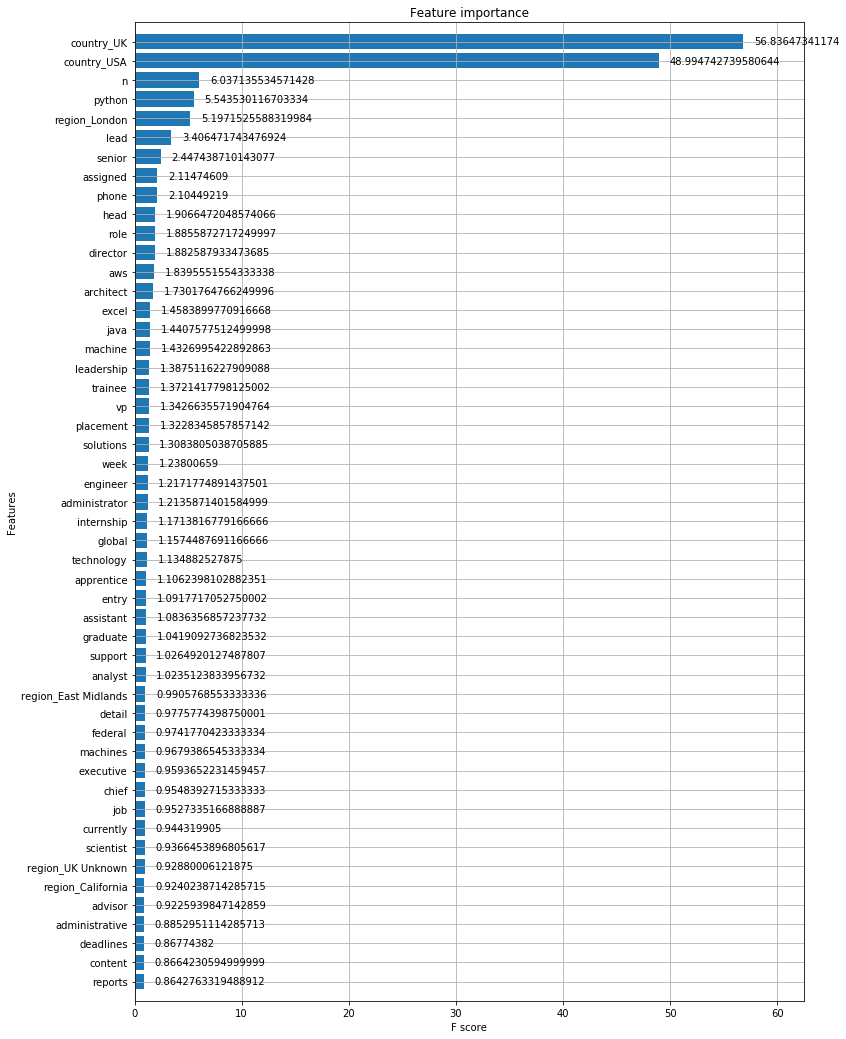

In [21]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.8, ax=ax, importance_type = 'gain')
plt.show()

NameError: name 'python' is not defined

In [5]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_val)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], x_val.iloc[0,:])

NameError: name 'shap' is not defined